In [1]:
import sqlite3
import pandas as pd
import numpy as np
# import relevant library

In [2]:
housing_database_connect = sqlite3.connect("housing.db")
housing_df = pd.read_sql("SELECT * FROM houses",housing_database_connect)
housing_df.head()  #make connection with database

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2217,909279080,50,RL,NaN,11275,Pave,None,IR1,HLS,...,0,None,None,None,0,3,2007,WD,Normal,220000
1,837,907126050,20,RL,65.0,9757,Pave,None,Reg,Low,...,0,None,None,None,0,10,2009,WD,Normal,143000
2,2397,528144030,60,RL,86.0,11065,Pave,None,IR1,Lvl,...,0,None,None,None,0,10,2006,New,Partial,281000
3,1963,535452060,20,RL,70.0,7000,Pave,None,Reg,Lvl,...,0,None,MnWw,None,0,4,2007,WD,Family,135000
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,None,None,None,0,1,2010,WD,Abnorml,102776


In [3]:
normal_df = housing_df[housing_df['Sale Condition']=='Normal']
# select Sales data under normal condition
column_names = ['Year Built','Gr Liv Area','Total Bsmt SF','SalePrice']
# select target column
subset = normal_df[column_names]
subset_df = pd.DataFrame(subset)
subset_df_clean = subset_df.dropna()
# clean out irrelevent data display
house_age = 2010 - subset_df_clean['Year Built']
# calculate house age
subset_df_clean['Age'] = house_age

In [4]:
price_correlation = subset_df_clean.corr()['SalePrice'].abs().sort_values()
price_correlation
# figure out correlation of the variables

Age              0.520716
Year Built       0.520716
Total Bsmt SF    0.635165
Gr Liv Area      0.740554
SalePrice        1.000000
Name: SalePrice, dtype: float64

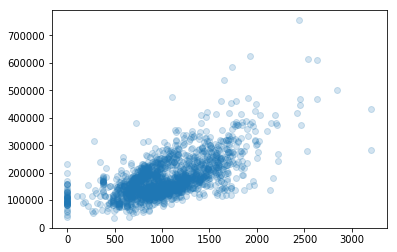

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
y = subset_df_clean['SalePrice']
x = subset_df_clean['Total Bsmt SF']
fig = plt.figure()
plt.scatter(x,y,alpha=0.2)
plt.show()
# shows the relationship between SalesPrice and total basement size on plot

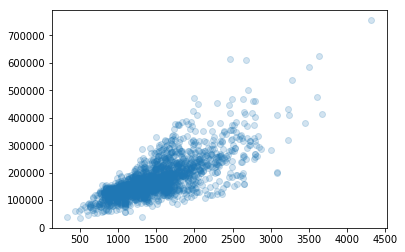

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
y = subset_df_clean['SalePrice']
x = subset_df_clean['Gr Liv Area']
fig = plt.figure()
plt.scatter(x,y,alpha=0.2)
plt.show()
# shows the relationship between SalesPrice and living area on plot

# Question 2

In [7]:
# Question 2
import statsmodels.api as sm
y = subset_df_clean['SalePrice']
x = subset_df_clean[['Gr Liv Area','Total Bsmt SF']]
model1 = sm.OLS(y, x)
results1 = model1.fit()
print(results1.summary())
# 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.035e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:38:11   Log-Likelihood:                -23183.
No. Observations:                1928   AIC:                         4.637e+04
Df Residuals:                    1926   BIC:                         4.638e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gr Liv Area      76.0048      1.592     47.737

In [8]:
# model with intercept

import statsmodels.api as sm

x_with_intercept = sm.add_constant(x, prepend=True)

x_with_intercept.head()

model = sm.OLS(y, x_with_intercept)

results2 = model.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2117.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:38:11   Log-Likelihood:                -23156.
No. Observations:                1928   AIC:                         4.632e+04
Df Residuals:                    1925   BIC:                         4.634e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.348e+04   3198.698     -7.342

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
# Question 2 C  for model 1  RMS

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted1 = results1.predict(x) #predict y


rms = sqrt(mean_squared_error(y, y_predicted1))
print(round(rms,3))

40353.738


In [10]:
# C for model 2 RMS
y_predicted2 = results2.predict(x_with_intercept) #predict y

rms = sqrt(mean_squared_error(y, y_predicted2))
print(round(rms,3))

39800.385


In [11]:
# C for model 1 R squared
from sklearn.metrics import r2_score
r2 = r2_score(y, y_predicted1)
print(round(r2,3))
# C for model 1 R squared
r2 = r2_score(y, y_predicted2)
print(round(r2,3))

0.679
0.687


# Question 2 D

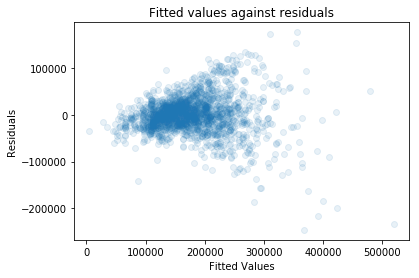

In [12]:
fitted_values = y_predicted2
residual1 = y_predicted2 - y
plt.scatter(fitted_values,residual1, alpha = 0.1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted values against residuals")
plt.show()

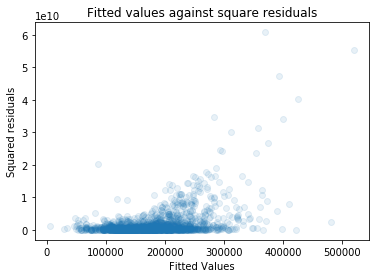

In [13]:
fitted_values = y_predicted2
residual1 = y_predicted2 - y
residual2 = residual1**2        
# square redsiduals
plt.scatter(fitted_values,residual2, alpha = 0.1)
plt.xlabel("Fitted Values")
plt.ylabel("Squared residuals")
plt.title("Fitted values against square residuals")
plt.show()

# Question 3

In [14]:
normal_df = housing_df[housing_df['Sale Condition']=='Normal']
# select Sales data under normal condition
column_names = ['Year Built','Gr Liv Area','Total Bsmt SF','SalePrice','Garage Area','Central Air']
# select target column
subset = normal_df[column_names]
subset_df = pd.DataFrame(subset)
subset_df_clean1 = subset_df.dropna()
# clean out irrelevent data display
house_age = 2010 - subset_df_clean['Year Built']
# calculate house age
subset_df_clean1['Age'] = house_age
subset_df_clean1.head()

,Year Built,Gr Liv Area,Total Bsmt SF,SalePrice,Garage Area,Central Air,Age
0,1932,1991,854.0,220000,432.0,Y,78
1,1994,990,990.0,143000,440.0,Y,16
5,1995,1609,754.0,182000,525.0,Y,15
7,1971,981,981.0,143250,576.0,Y,39
8,1959,1466,1466.0,149900,528.0,Y,51


In [15]:
model007 = pd.get_dummies(subset_df_clean1,columns = ['Central Air'],
    drop_first = True)
cnm.head()
# get dummy variable

NameError: name 'cnm' is not defined

In [16]:
import statsmodels.api as sm

y = model007['SalePrice']
x = model007[['Age','Gr Liv Area','Total Bsmt SF','Garage Area','Central Air_Y']]
model13 = sm.OLS(y, x)
results13 = model13.fit()
print(results13.summary())
# analyize model with dummy

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.158e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:38:57   Log-Likelihood:                -22854.
No. Observations:                1928   AIC:                         4.572e+04
Df Residuals:                    1923   BIC:                         4.575e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age            -540.4697     24.029    -22.493

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
origin_list = ['Age','Gr Liv Area','Total Bsmt SF','Garage Area','Central Air_Y','SalePrice']
scale_result_list = ['age1','liv1','bsmt1','garage1','air1','saleprice1']
for item in range(len(origin_list)):
    model007[scale_result_list[item]] = scale(cnm[origin_list[item]])

NameError: name 'cnm' is not defined

In [99]:
model007 = pd.DataFrame(model007)
z = model007['log_saleprice1']
z = np.array(z)   #convert into array, which allows other indexing
ztt = z[np.logical_not(np.isnan(z))]
print(ztt)

[-4.80544761e-01 -2.46919504e+00 -2.75542202e+00  6.90679904e-01
 -5.75795148e-01 -1.49109980e+00 -1.31950894e+00  4.71096821e-01
 -8.28805470e-02 -4.54377551e-02  1.65797623e-01 -1.62439656e+00
 -1.62439656e+00  6.51184930e-01 -4.04048745e-01  4.26256845e-01
  1.34789165e+00 -3.13582674e-01 -1.49109980e+00  5.67182975e-01
 -1.21780021e-01 -2.18260567e+00 -3.24781254e+00 -1.04540423e+00
 -6.40289822e-01  6.01635036e-01 -3.13582674e-01  4.21660249e-01
 -2.07632767e+00 -1.55552882e+00  7.04663572e-01  3.86495318e-01
 -1.54027188e-01  1.59829332e-01 -6.02470649e-02 -3.60971811e+00
 -3.13582674e-01  1.16991589e-02 -2.65064328e+00 -2.87247830e+00
 -1.86504687e+00 -3.72975115e-01 -2.55580936e+00  7.21872582e-01
 -3.37902311e-01 -1.69836016e+00 -1.46949579e+00 -2.06518714e+00
  1.65797623e-01 -7.90254117e+00 -8.30496467e-01  1.05780586e+00
  1.03182303e-01 -9.68521111e-01  1.62638440e+00 -9.68521111e-01
 -2.30626057e-01 -1.37349930e+00 -3.55910836e+00 -1.04540423e+00
 -1.04540423e+00 -4.80544

In [96]:

y = ztt
x = cnm[['age1','liv1','bsmt1','garage1','air1']]
model13 = sm.OLS(y, x)
results13 = model13.fit()
print(results13.summary())
# 

ValueError: endog and exog matrices are different sizes

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'log(SalePrice)')

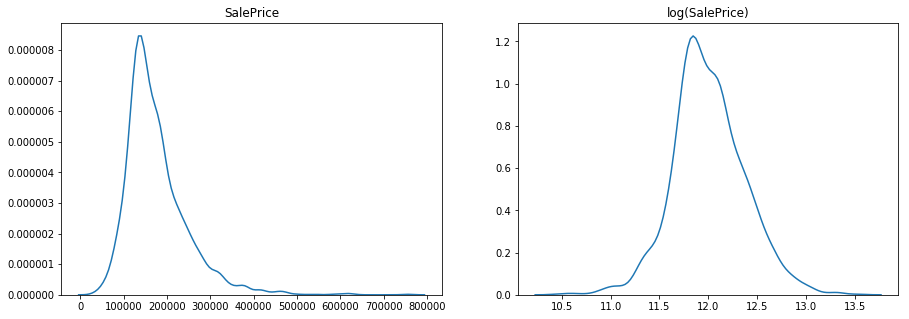

In [22]:
# do log
cnm['sale log'] = np.log(cnm['SalePrice'] + 1)
import seaborn as sns
y_train = cnm['SalePrice']
y_train_log = cnm['sale log']
f, axes = plt.subplots(1, 2, figsize = (15, 5))            
sns.kdeplot(y_train, ax = axes[0], legend = None)
axes[0].set_title('SalePrice')
sns.kdeplot(y_train_log, ax = axes[1], legend = None)
axes[1].set_title('log(SalePrice)')

# Draft

In [82]:
model007 = pd.DataFrame(model007,columns=['saleprice1'])
print(model007)


      saleprice1
0       0.618446
1      -0.463188
5       0.084653
7      -0.459676
8      -0.366262
10      0.063582
11     -0.716037
12      1.995072
13     -0.631754
14      0.562258
15     -0.575565
17     -0.814368
18      0.225125
20      0.267267
21      1.601750
22      0.920461
23     -0.449140
26      0.955579
31      1.180334
32     -0.723061
33     -0.775738
35     -0.112008
36      0.197031
38      0.197031
39     -0.394356
41     -0.628242
42      1.917812
43      0.667612
44      1.531514
45      3.849301
...          ...
2311   -0.707609
2312   -0.456164
2314   -0.154149
2315   -0.294621
2316   -0.547471
2317    0.534163
2318    0.112747
2320    1.517467
2321   -0.013677
2322    0.407738
2323    0.477974
2324   -0.617707
2325    0.337502
2326   -1.249831
2327    0.996316
2328    0.267267
2329    0.049535
2330   -0.069866
2331    1.376995
2333   -1.362208
2334   -1.334114
2335   -0.730084
2336   -0.421046
2337    0.039000
2338    0.302385
2339   -0.687943
2340   -0.0417

In [93]:
z = model007['log_saleprice1']
z = np.array(z)   #convert into array, which allows other indexing
ztt = z[np.logical_not(np.isnan(z))]

[-4.80544761e-01 -2.46919504e+00 -2.75542202e+00  6.90679904e-01
 -5.75795148e-01 -1.49109980e+00 -1.31950894e+00  4.71096821e-01
 -8.28805470e-02 -4.54377551e-02  1.65797623e-01 -1.62439656e+00
 -1.62439656e+00  6.51184930e-01 -4.04048745e-01  4.26256845e-01
  1.34789165e+00 -3.13582674e-01 -1.49109980e+00  5.67182975e-01
 -1.21780021e-01 -2.18260567e+00 -3.24781254e+00 -1.04540423e+00
 -6.40289822e-01  6.01635036e-01 -3.13582674e-01  4.21660249e-01
 -2.07632767e+00 -1.55552882e+00  7.04663572e-01  3.86495318e-01
 -1.54027188e-01  1.59829332e-01 -6.02470649e-02 -3.60971811e+00
 -3.13582674e-01  1.16991589e-02 -2.65064328e+00 -2.87247830e+00
 -1.86504687e+00 -3.72975115e-01 -2.55580936e+00  7.21872582e-01
 -3.37902311e-01 -1.69836016e+00 -1.46949579e+00 -2.06518714e+00
  1.65797623e-01 -7.90254117e+00 -8.30496467e-01  1.05780586e+00
  1.03182303e-01 -9.68521111e-01  1.62638440e+00 -9.68521111e-01
 -2.30626057e-01 -1.37349930e+00 -3.55910836e+00 -1.04540423e+00
 -1.04540423e+00 -4.80544